# Linear Classification
## Simple Linear Classification

### Binary linear Classification by example

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Given labeled training-data T:

In [2]:
T=np.array([[1,1,0],
         [1,3,0],
         [2,1,0],
         [3,0,0],
         [3,1,1],
         [3,2,1],
         [4,1,1],
         [2,3,1]])

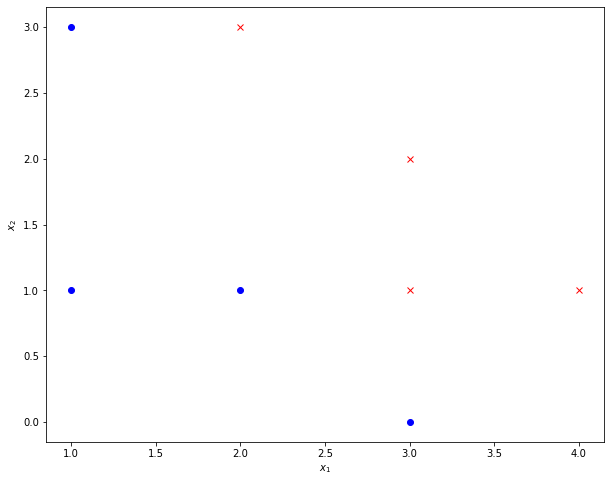

In [3]:
plt.figure(figsize=(10,8))
plt.plot(T[:4,0],T[:4,1],"ob")
plt.plot(T[4:,0],T[4:,1],"xr")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

The task is to learn a discrimant 

$$
g(\mathbf{x})=w_0 + w_1 x_1 + w_2 x_2
$$ (discriminant)

such that

$$
g(\mathbf{x}) = \left\{ 
\begin{array}{ll}
> 0 & \mbox{ for all }\mathbf{x}_t \mbox{ with } r_t=1 \\
< 0 & \mbox{ for all }\mathbf{x}_t \mbox{ with } r_t=0 \\
\end{array}
\right.
$$ (disccond)

All datapoints $\mathbf{x}$, which fulfill $g(\mathbf{x}) = 0$ lie on the discriminator line. I.e. 

$$
g(\mathbf{x})=w_0 + w_1 x_1 + w_2 x_2 =0
$$ (linedef)

is the **implicit definiton of the discriminator line**.

This implicit line-definition can easily be transformed to the more common line definition of type $y=mx+b$. 
Equation {eq}`linedef` is rearranged such that $x_2$ is isolated:  

$$
x_2 = - \frac{w_1}{w_2} x_1 - \frac{w_0}{w_2}
$$

In the given example $x_2$ corresponds to $y$ and $x_1$ corresponds to $x$. Hence the slope of the line is

$$
m = - \frac{w_1}{w_2}
$$

and its intersection with the $x_2$-axis is:

$$
b= - \frac{w_0}{w_2}
$$

A line, which separates the training data, given in this example is:

$$
x_2= 5 - 1.43 x_1
$$

This line is visualized below:

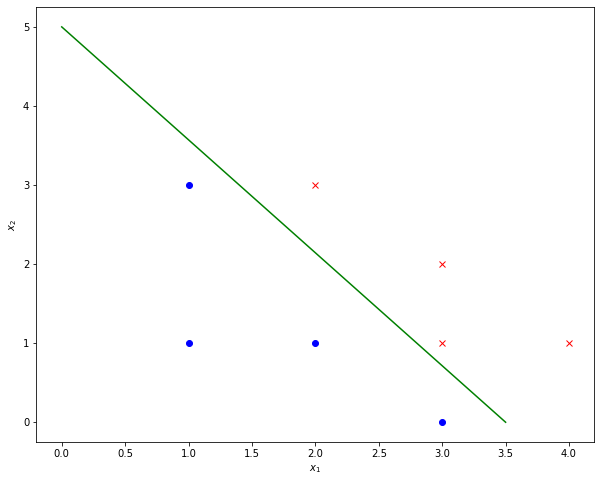

In [4]:
plt.figure(figsize=(10,8))
plt.plot(T[:4,0],T[:4,1],"ob")
plt.plot(T[4:,0],T[4:,1],"xr")
plt.plot([0,3.5],[5,0],"g")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

For this line we have a slope of 

$$
\frac{-5}{3.5} = -1.43 = - \frac{w_1}{w_2}
$$ (slope)

and an intersection with the $x_2$-axis of

$$
5= - \frac{w_0}{w_2}
$$ (intercept)

In order to determine the corresponding weights $w_i$ one can freely choose one arbitrary $w_i$, e.g. we set 

$$
w_2 =1.0
$$

Given this selection we can derive 

$$
w_1 = 1.43
$$

from equation {eq}`slope` and

$$
w_0 = -5
$$

from equation {eq}`intercept`.





We can check, if these weights actually fullfill the conditions, given in equation {eq}`disccond` for all elements of the given training data $T$.

First we evaluate $g(\mathbf{x})= w_0+w_1 x_1 + w_2 x_2$ for the first 4 training elements, which have a label $r_t=0$ and we obtain, that for all of them $g(\mathbf{x})<0$.`

In [5]:
for x in T[:4,:2]:
   print(-5+1.43*x[0]+1*x[1]) 

-2.5700000000000003
-0.5700000000000003
-1.1400000000000001
-0.71


The last 3 training samples have $r_t=1$, and as shown below for all of them we yield $g(\mathbf{x})>0$.

In [6]:
for x in T[4:,:2]:
   print(-5+1.43*x[0]+1*x[1]) 

0.29000000000000004
1.29
1.7199999999999998
0.8599999999999999


Now assume, that we have a new datapoint 

$$
x=[2,2.5],
$$

which must be classified. For this we just insert this point into $g(\mathbf{x})$:

In [7]:
output=-5+1.43*2+1*2.5
print(output)

0.3599999999999999


Since we obtain $g(\mathbf{x})>0$, this datapoint can be assigned to the class with label $1$.

### K-ary linear classification in $d$-dimensional space

In the example above binary linear classification of 2-dimensional input data $\mathbf{x}$ has been demonstrated. In the **general case of $d$-dimensional input data**, the discriminator equation ({eq}`discriminant` for the 2-dimensional case) is:

$$
g(\mathbf{x})=w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_d x_d
$$ (discd)

The discriminator conditions remain the same as in equation {eq}`disscond` and the equation 

$$
g(\mathbf{x})=w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_d x_d = 0
$$ (discplane)

now defines a $d-1$ dimensional hyperplane, which discriminates the classes in the $d$-dimensional space.

The generalisation from binary classification to **$K$-ary classification** is realized by applying for each of the $K$ classes one individual equation of type {eq}`discd`:

$$
g_1(\mathbf{x})  =  w_{1,0} + w_{1,1} x_1 + w_{1,2} x_2 + \cdots + w_{1,d} x_d \\
g_2(\mathbf{x})  =  w_{2,0} + w_{2,1} x_1 + w_{2,2} x_2 + \cdots + w_{2,d} x_d \\
\vdots  \\
g_K(\mathbf{x})  =  w_{K,0} + w_{K,1} x_1 + w_{K,2} x_2 + \cdots + w_{K,d} x_d \\
$$ (kdisc)

In this case $K \cdot (d+1)$ weights $w_{i,j}$ must be learned. The class labels are $r_p \in [ 1,2,\ldots K ]$. The weights are learned such that for each training element $(\mathbf{x}_p,r_p)$ 

$$
r_p= \mbox{ argmax}_{j} \; g_j(\mathbf{x}_p),
$$

i.e. if the current target label is $r_p=k$, then the output of $g_k(\mathbf{x}_p)$ must be larger than the output of all other $K-1$ $g_i(\mathbf{x}_p)$. 

## Binary Logistic Regression

Despite the name Logistic Regression is a binary linear classification as introduced above. The only difference is that in Logistic Regression the output of the discriminator $g(\mathbf{x})$ is passed to a sigmoid-function. In general, the sigmoid function is defined as follows:

$$
sigmoid(x)=\frac{1}{1+e^{-x}}.
$$

The graph of this function is depicted below. As can be seen, the functions value range is $[0,1]$. 

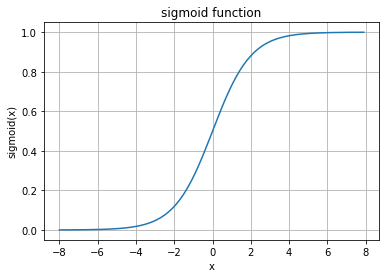

In [21]:
x=np.arange(-8,8,0.1)
y=1/(1+np.exp(-x))
plt.plot(x,y)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("sigmoid function")
plt.show()

I.e. the output of the Logistic Regression is:

$$
y=sigmoid(g(\mathbf{x}))=\frac{1}{1+e^{-g(\mathbf{x})}}.
$$


Note that this post-processing by the sigmoid-function has no influcence on the class-boundary. The discriminator line in the 2-dimensional space (in general: the $d-1$-dimensional discriminator hyperplane in $d$-dimensional space) is still defined by the weights $w_i$, only. The application of the sigmoid function just scales the output values of $g(\mathbf{x})$ into the range $[0,1]$.

Due to this rescaling the classification criteria must be adapted as follows:

* If $y=sigmoid(g(\mathbf{x})) > 0.5$ then assign class-label $1$
* If $y=sigmoid(g(\mathbf{x}))  < 0.5$ then assign class-label $0$

Moreover:
* if $y$ is close to $0$, then we have a **high confidence** for the decision for class-label 0.
* if $y$ is close to $1$, then we have a **high confidence** for the decision for class-label 1.
* if $y$ approximates $0.5$ from below, then we have a **low confidence** for the decision for class-label 0.
* if $y$ approximates $0.5$ from above, then we have a **low confidence** for the decision for class-label 1. 


This additional confidence-information, provided by Logistic Regression, constitutes a often required advantage with respect to simple linear regression. If data in both classes is Gaussian distributed with the same covariance-matrix. The the ouput value $y$ is actually the A-posteriori $P(C_1|x)$ for class 1. 

## K-ary logistic Regression

K-ary logisitic regression (or MaxEnt-Classification or Softmax-Classification) is the extension of Logistic Regression to the case where $K>2$ classes must be distinguished. As in Logistic Regression now the outputs of the discriminator functions $g_i(\mathbf{x})$ 
* are post-processed by a function, whose output-value range is $[0,1]$
* are estimates of the a-posteriori $P(C_i|\mathbf{x})$.

The applied post-processing function is the softmax-function. It calculates the classifier outputs as follows:

$$
y_i =\frac{e^{g_i(\mathbf{x})}}{\sum_{j=1}^K e^{g_j(\mathbf{x})}} \quad \forall i \in [1,\ldots,K].
$$

## Training of Linear Classifiers
Classifiers are usually trained by minimzing an error function. For binary classification the most common error function is **binary cross-entropy**, which is defined as follows 

$$
E(T,\Theta)=  \sum\limits_{t=1}^N r_{t} \log y_{t}+(1-r_{t}) \log(1-y_{t}),
$$ 

where $r_t$ is the target class-label of the $t.th$ training-element and $y_t$ is the output for the input $x_t$.

For K-ary classification the common error function is **cross-entropy**: 

$$
E(T,\Theta)= \sum\limits_{t=1}^N \sum\limits_{k=1}^K r_{t,k} \log(y_{t,k}).
$$

There exists different methods to adapt the weights $w_i$ such that the error-function is minimized. The most popular approaches are **Coordinate Descent**, **Gradient Descent** or **Stochastic Gradient Descent (SGD)**. These approaches are described in the section on [conventional neural networks](../neuralnetworks/01NeuralNets). In this section it is also shown how linear classifiers can be realized by Single Layer Perceptrons (SLP).

As already described in section [Linear Regression](LinReg), **Regularisation** terms can be added to the error function in order to reduce overfitting (see also [Logistic Regression in scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)).

## Generalized Linear Classification
With **Linear Classification** one can not only learn linear discriminators $g(\mathbf{x})$ of type {eq}`discriminant`. Instead the same trick as already introduced in section [Linear Regression](LinReg.md) can be applied to learn nonlinear discriminator surfaces: Since we are free to preprocess the input vectors $\mathbf{x}$ with an arbitrary aomount $z$ of preprocessing functions $\Phi_i$ of arbitrary type (linear and non-linear), a **Generlized Linear Classifier** with discriminator(s) of type 

$$
g(\mathbf{x})=w_0 + w_1 \Phi_1(\mathbf{x}) + w_2 \Phi_2(\mathbf{x}) + \cdots + w_z \Phi_z(\mathbf{x})
$$ (genlin)

can be learned. This type of generalization can be applied to binary- and non-binary- and to simple and logistic classification.

## Final Remarks
In contrast to Bayesian Classification, as introduced in [section Bayes- and Naive Bayes Classification](parametricClassification1D), in Linear Classification we do not learn class-specific probability distributions, but class boundaries. In general all classifiers, which learn a class-specific probability distributions are called **Generative Models**, because these distributions can be applied to generate new data of this type. On the other side, methods which directly learn discriminators, are called **Discriminative Models**. For Generative Models one must assume a certain type of data-distribution (e.g. Gaussian), whereas in Discriminative Models one must assume a certain type of class-boundary. For real-world data Discriminative Models are more robust, than Generative Models, because the assumption of a class-boundary type is usually more realistic than the assumption of a data distribution.